# Project: Facial Emotion Recognition (happy or sad) using CNN

## Objective
My goal is to build an image classification pipeline that can accurately identify human emotions (happy or sad) from facial images.
I’ll prepare and preprocess the data, design and train a CNN model, and finally test it on my own images to evaluate its accuracy.

Step 1: Set up

In [1]:
!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import tensorflow as tf
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

Setp 2: Remove corrupted images

In [18]:
data_dir = 'data'  # Folder with subfolders 'Happy' and 'Sad'
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Removing invalid image:', image_path)
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image:', image_path)

Issue with image: data\happy\05-12-21-happy-people.jpg
Issue with image: data\happy\07-120104-happy_people_are_not_nice_people.jpg
Issue with image: data\happy\1-2.jpg
Issue with image: data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with image: data\happy\11-Habits-of-Truly-Happy-People.jpg
Issue with image: data\happy\154006829.jpg
Issue with image: data\happy\170404-happy-workers-feature.jpg
Issue with image: data\happy\1902539.jpg
Issue with image: data\happy\1902540.jpg
Issue with image: data\happy\1902587.jpg
Issue with image: data\happy\1920px-face-smile.svg_.png.jpg
Issue with image: data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issue with image: data\happy\227-2271622_happy-people-business-team-celebrating-png.png
Issue with image: data\happy\60632274._UY200_.jpg
Issue with image: data\happy\7-Habits-of-Happy-People-image.jpeg
Issue with image: data\happy\7-principles-of-successful-and-happy-people.png
Issue with image: data\happy\7Y57w0983emdERAoQylUHIGkoEk1cIF

Step 3: Load Dataset

Found 305 files belonging to 2 classes.


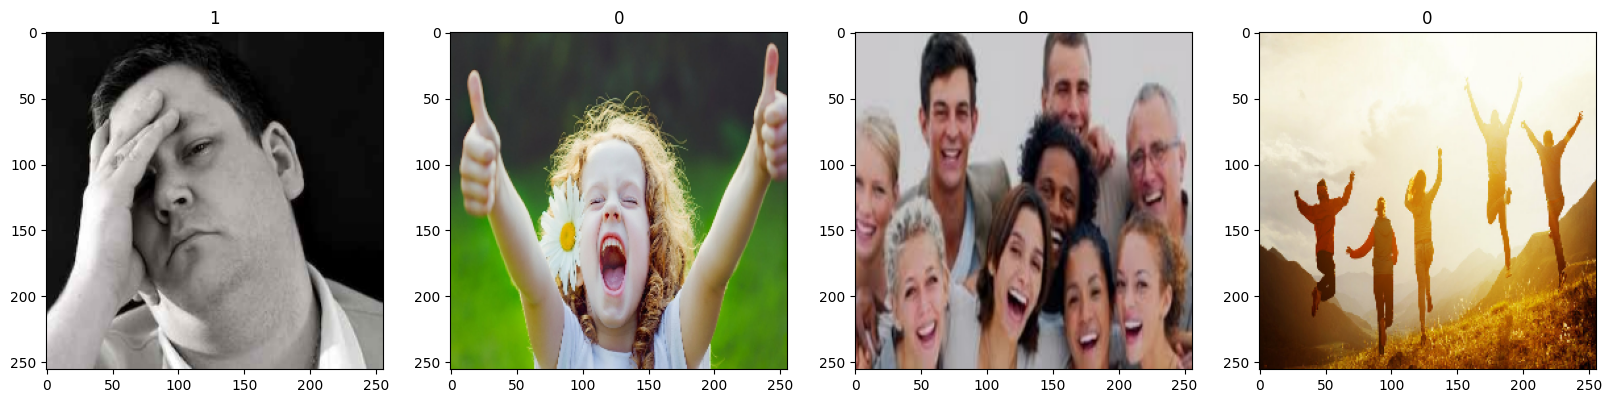

In [19]:
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
plt.show()

Step 4: Scale the data

In [20]:
data = data.map(lambda x, y: (x/255, y))

Step 5: Split Dataset

In [21]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

Step 5: Building a CNN model

In [22]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    
    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D(),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

Summary:

In [23]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Step 7: Train the model

In [24]:
hist = model.fit(train, validation_data=val, epochs=10, verbose=1) 

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - accuracy: 0.5268 - loss: 1.1866 - val_accuracy: 0.4688 - val_loss: 0.8416
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.4866 - loss: 0.7216 - val_accuracy: 0.4844 - val_loss: 0.6818
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 279ms/step - accuracy: 0.5714 - loss: 0.6688 - val_accuracy: 0.8281 - val_loss: 0.5913
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 292ms/step - accuracy: 0.7723 - loss: 0.5703 - val_accuracy: 0.8750 - val_loss: 0.4399
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 0.7991 - loss: 0.4605 - val_accuracy: 0.9844 - val_loss: 0.3118
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 297ms/step - accuracy: 0.8884 - loss: 0.3430 - val_accuracy: 0.9531 - val_loss: 0.2809
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step - accuracy: 0.8929 - loss: 0.2691 - val_accuracy: 0.8906 - val_loss: 0.2476
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 289ms/step - accuracy: 0.9018 - loss: 0.2482 - val_accuracy: 0.9375 - val_loss:

Step 8: Plot the performance

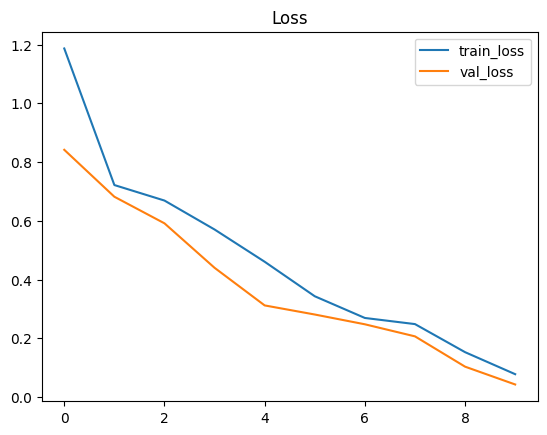

In [25]:
# Loss
plt.figure()
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()
plt.show()

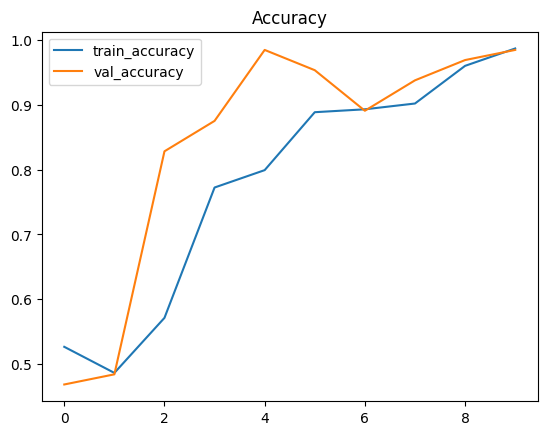

In [26]:
# Accuracy
plt.figure()
plt.plot(hist.history['accuracy'], label='train_accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

Step 9: Evaluate on test set

In [27]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f"Test Precision: {pre.result().numpy()}")
print(f"Test Recall: {re.result().numpy()}")
print(f"Test Accuracy: {acc.result().numpy()}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Test Precision: 1.0
Test Recall: 1.0
Test Accuracy: 1.0


Step 10: Test with my own image

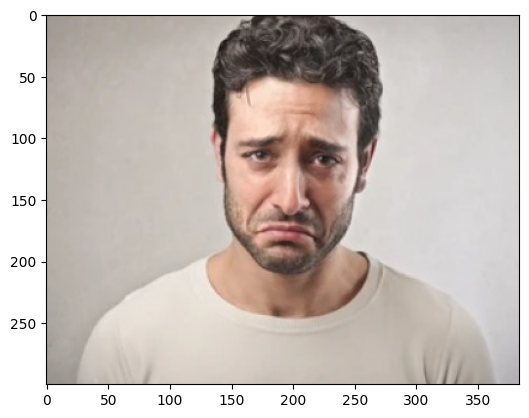

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
[[0.94950145]]
Predicted class: Sad


In [28]:
test_image_path = 'man.jpg' 
img = cv2.imread(test_image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)

if yhat > 0.5: 
    print("Predicted class: Sad")
else:
    print("Predicted class: Happy")

Step 11: Save model

In [29]:
model.save('models/imageclassifier.h5')